In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/[Data1]drug_absorbance.csv')

### 0. import data set

In [ ]:
df.head()

,Concentration,Maximum Absorbance
0,0.00,3.96
1,0.05,3.78
2,0.10,4.55
3,0.15,4.60
4,0.20,5.90


In [ ]:
df.shape

(200, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Concentration       200 non-null    float64
 1   Maximum Absorbance  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


### 1. How to minimize cos finction?


**[Cost Funtion]**

* 예측값과 실제값의 차이를 최소화하는 W, b의 값을 찾는 함수
* 이 손실함수의 최솟값을 찾는 여러 기법 중 하나가 바로, 'Gradien descent algorithm'

**[Gradien descent algorithm]**

* 손실함수의 미분값을 이용하는 방법. 반복적인 미분을 통해 기울기가 0이 되는 최적값을 찾아나감.
* 손실함수 값이 -인 방향으로 파라미터를 계속해서 업데이트해나감 > **경사하강의 원리**
* Convex function의 형태인지 확인해야 함

  **Learning rate**
  * gradient descent의 파라미터 업데이트 과정(미분값 만큼 이동시키는 과정)에서 한 스텝에 얼마만큼 움직일지를 정함

  **Batch vs Stochastic**
  * Batch gradient descent(전체 데이터 셋에 대해 수행) vs Stochastic gradient descent, SGD(전체 데이터셋을 샘플링해 빠르게 최적값을 찾음)
  * SGD가 빠른 속도로 최적값을 찾을 수 있다는 장점은 존재하나, learning rate를 잘못 설정할 경우 local minima에 빠지게 될 가능성이 있음
  * 때문에 이 둘의 절충안인 mini-batch gradient descent를 사용함.
  (경우에 따라서 SGD가 mini-batch를 의미하기도함)
  

### 2.Implementation of Grdient Descent

iteration=0, 기울기=11.4131, 절편=14.4323


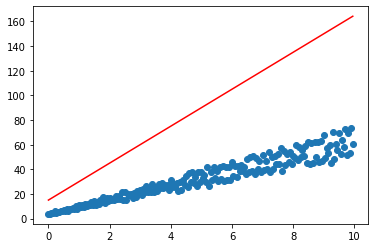

None
iteration=50, 기울기=4.5617, 절편=12.2520


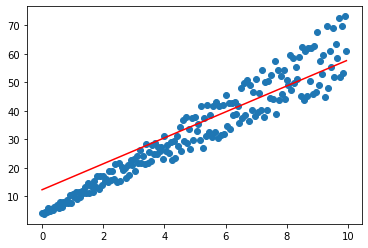

None
iteration=100, 기울기=4.7112, 절편=11.2649


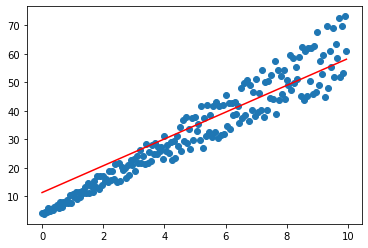

None
iteration=150, 기울기=4.8434, 절편=10.3923


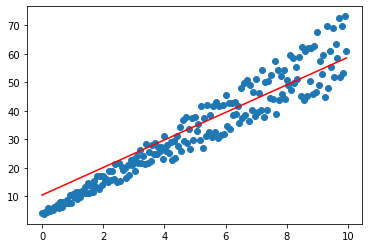

None
iteration=200, 기울기=4.9603, 절편=9.6208


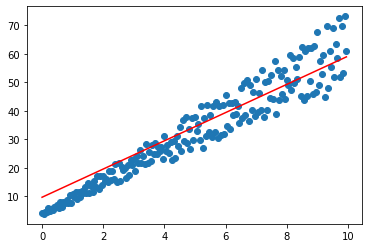

None
iteration=250, 기울기=5.0636, 절편=8.9389


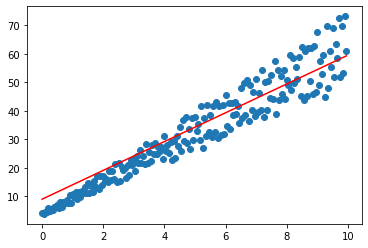

None


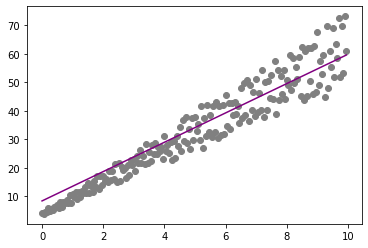

In [ ]:
x = df['Concentration']
y = df['Maximum Absorbance']

# 넘파이 배열로 변환
x_data = np.array(x)
y_data = np.array(y)

# 초기 기울기 a와 절편 b의 값 세팅
a = 15
b = 15

# 학습률 세팅
lr = 0.005
iteration = 300

# 빈 array 생성
costs = []

# 경사하강 진행
for i in range(iteration):
  y_pred = a*x_data+b
  error = y_data - y_pred
  cost = (((y_pred-y_data)**2).mean())/2

  # 오차함수를 a로 편미분
  a_diff = -(2/len(x_data))*sum(x_data*(error))
  # 오차함수를 b로 편미분
  b_diff = -(2/len(x_data))*sum(error)

  a = a - lr * a_diff
  b = b - lr * b_diff

  costs.append(cost)

  if i%50 == 0 :
    plt.scatter(x,y)
    plt.plot(x_data,y_pred,color='red')
    print("iteration=%.f, 기울기=%.04f, 절편=%.04f" %(i, a, b))
    print(plt.show())

# 최종 모델 시각화
y_pred = a*x_data+b
plt.scatter(x,y,color='gray')
plt.plot([min(x_data),max(x_data)],[min(y_pred),max(y_pred)],color='purple')
plt.show()


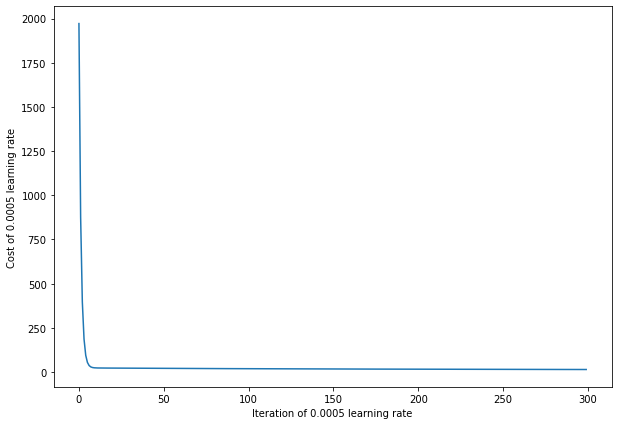

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(costs)
plt.xlabel('Iteration of 0.0005 learning rate')
plt.ylabel('Cost of 0.0005 learning rate')
plt.show()